In [30]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [8]:
# 연도만 추출하여 새로운 열(year) 만들기
sales['year'] = sales['datesold'].dt.year
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [31]:
import numpy as np

# round 메소드 :
# groupby 메소드 : 
# agg 메소드 : 
result = np.round(sales.groupby('year')['price'].agg("mean"), 1)
result

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

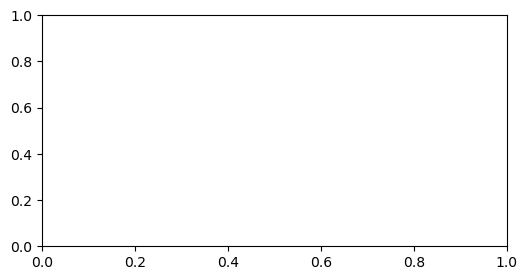

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
plt.show()

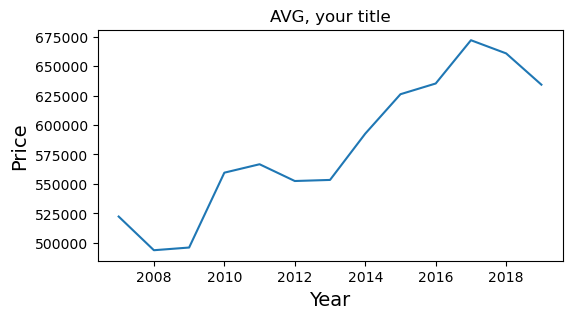

In [19]:
# 시간의 변동에 따라서 추세를 확인
# 선 그래프
fig, ax = plt.subplots(figsize=(6, 3)) # 도화지 영역

# x축 : result.index 값 y축 : result.values 값
ax.plot(result.index, result.values) # 시각화 큰 틀 영역


# 상단 제목 설정
# size에 따라 글자의 크기가 달라진다
# 한글 폰트의 경우 깨져서 나오므로 별도로 지정을 해야한다
# 코드 순서 주의 !!

# 세부 옵션
ax.set_title('AVG, your title', size=12)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Price', size=14)

# 그래프 파일 저장하기
plt.savefig('output/matplotlib01.png')

# 그래프 그리기
plt.show()

## 막대 그래프 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# parse_dates : 
sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [53]:
# 월별 막대 그래프를 x축으로 기준
# 2007년, 2008년 병합
# 년도와 달을 의미하는 새로운 칼럼 생성
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

# 첫번째 레코드(= 0번 인덱스 행) 출력
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [22]:
# df = sales vs df = sales.copy()
# 둘의 가장 큰 차이점은 어떤 메모리를 참조하느냐이다
# df = sales 코드의 경우 df는 sales가 참조하는 메모리와 같은 메모리를 참조하게 된다.
# 즉, sales 데이터를 수정하게 되면 df의 데이터도 같이 수정되게 된다.
# 반면, df = sales.copy()의 경우 서로 독립적인 메모리를 참조하므로 sales 데이터를 변경하더라도
# df 변수에는 영향이 없다
df = sales.copy()
df.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [25]:
df = df.loc[df['year'].isin([2007, 2008]), :]
df.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24611,2008-12-16,2601,279000,unit,1,2008,12
24612,2008-12-22,2603,350000,unit,2,2008,12
24613,2008-12-23,2606,315000,unit,2,2008,12
24614,2008-12-24,2606,400000,unit,3,2008,12
24615,2008-12-24,2612,440000,unit,2,2008,12


In [54]:
# np.round(n) 메소드 : 소수점 n자리까지 반올림 하여 표현
# n을 입력하지 않은 경우 default : 0
# pandas.DataFrame.agg
result = np.round(df.groupby(['year', 'month'])['price'].agg("mean"), 1)
result.reset_index()

# 만약 3개월로 끊어서 가져오고 싶은경우 아래와 같이 작성할 수 있다
# 시작인덱스~끝인덱스까지 step을 3으로 해서 가져옴
# iloc는 stop을 포함하지 않는다는 것 다시 복기하기 !
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3


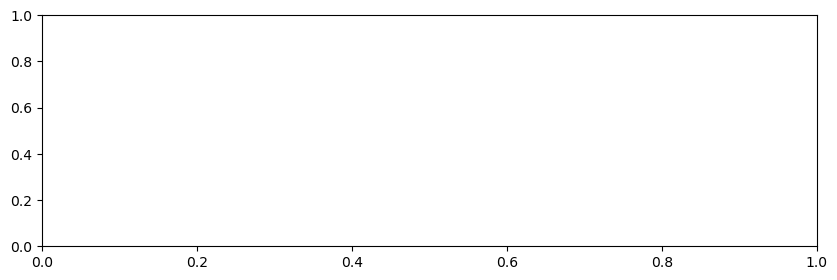

In [56]:
# OOP style code
fig, ax = plt.subplots(figsize = (10, 3))

In [61]:
result = result.reset_index()
result['year'].unique()

array([2007, 2008], dtype=int32)

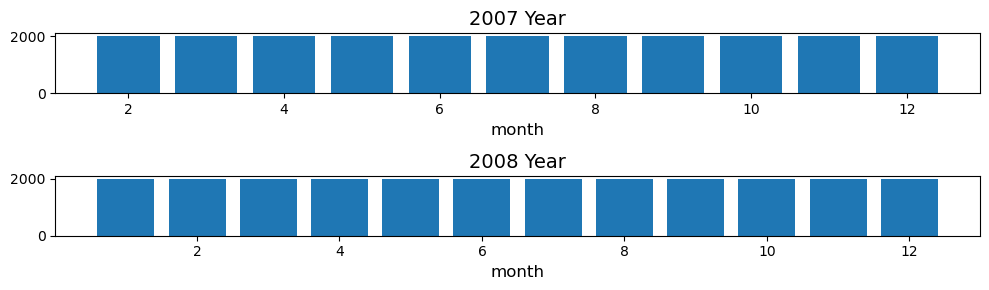

In [77]:
result_2007 = result.loc[result['year'] == 2007, :]
result_2008 = result.loc[result['year'] == 2008, :]

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 3))

ax[0].bar(result_2007['month'], result_2007['year'])
ax[1].bar(result_2008['month'], result_2008['year'])

# ax[indexNum] 별로 옵션을 줄 수 있다.
# ax[indexNum] 별로 상단의 제목 설정
ax[0].set_title('2007 Year', size = 14)
ax[1].set_title('2008 Year', size = 14)

ax[0].set_xlabel('month', size = 12)
ax[1].set_xlabel('month', size = 12)

# 그래프의 간격을 떨어뜨림
plt.tight_layout()

# 그래프 출력
plt.show()

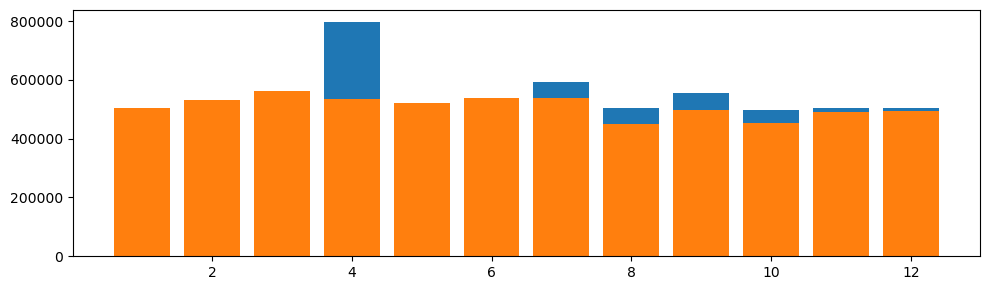

In [81]:
# 기본 도화지 세팅
fig, ax = plt.subplots(figsize = (10, 3))

# 그래프 그리기
ax.bar(result_2007['month'], result_2007['price'])
ax.bar(result_2008['month'], result_2008['price'])

# 간격 띄우기
plt.tight_layout()

# 그래프 보여주기
plt.show()


# Question : 왜 색깔이 다르게 나오는지?

## Seaborn

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales

# year, month 새로운 칼럼 생성
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

df = sales.loc[sales['year'].isin([2008, 2018]), :].reset_index(drop=True)
df.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2008-01-02,2906,309000,house,2,2008,1
1,2008-01-14,2602,413000,house,3,2008,1
2,2008-01-15,2905,445000,house,4,2008,1
3,2008-01-15,2902,600000,house,4,2008,1
4,2008-01-17,2605,417500,house,2,2008,1


/Users/gimtaegi/anaconda3/envs/mulcamp34/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gimtaegi/anaconda3/envs/mulcamp34/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


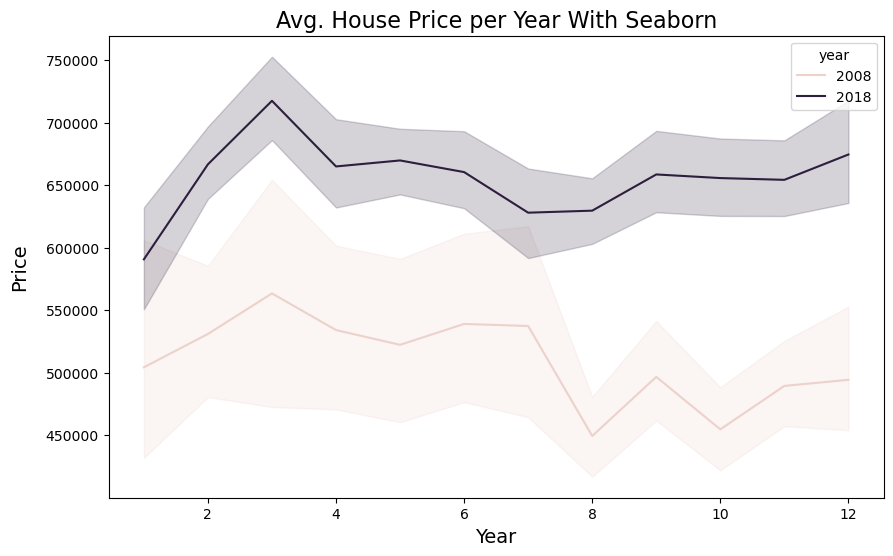

In [92]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

# data 입력 -> x축에 'month'열, y축에 'price'열 입력 -> 'year'범례 생성
sns.lineplot(data=df, x='month', y='price', hue='year', ax = ax)
ax.set_title('Avg. House Price per Year With Seaborn', size = 16)

# x축 라벨 설정
ax.set_xlabel('Year', size=14)

#y축 라벨 설정
ax.set_ylabel('Price', size=14, labelpad=12)

plt.show()

## Boxplot & 이상치(outlier) 제거 
- boxplot : 데이터의 분포, 중앙값, 분위수, 이상치 등을 시각적으로 표현

In [12]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])

# year, month 새로운 칼럼 생성
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


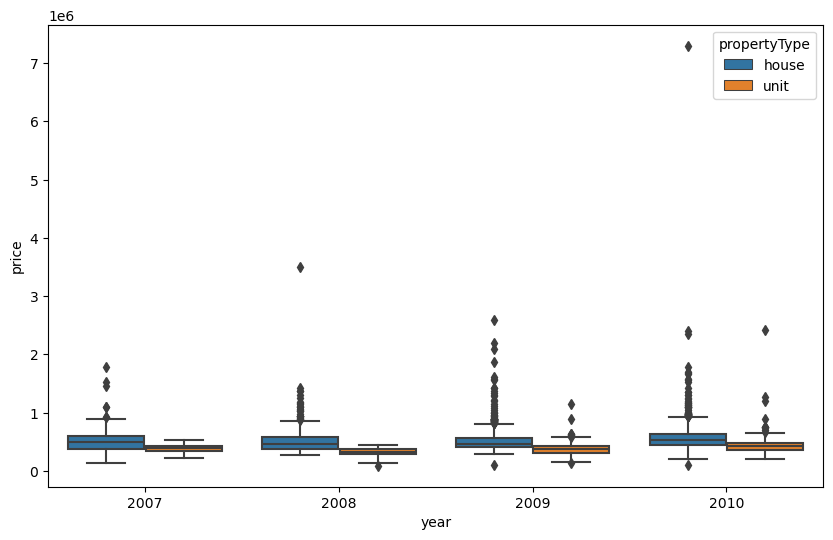

In [15]:
# 2007 ~ 2010 추출
df = sales.loc[sales['year'].isin([2007, 2008, 2009, 2010]), :]

# 도화지 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# boxplot 그리기
# boxplot을 그린 목적은 중위값을 그룹간에 비교하려고 하는 것인데
# 이상치가 존재하면 그린 이유가 없어지므로 이상치를 제거해야 한다.

# data 입력 -> x축에 'month'열, y축에 'price'열 입력 -> 'propertyType'범례 생성
sns.boxplot(data=df, x='year', y='price', hue='propertyType', ax=ax)

# 그래프 그리기
plt.show()

In [18]:
# sample DataFrame
data = {'values' : [10, 12, 12, 13, 12, 11, 14, 13, 15, 102, 12, 14, 14, 17, 18, 19, 20]}
temp_df = pd.DataFrame(data)
temp_df

,values
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,13
8,15
9,102


In [21]:
# 1단계 : Q1, Q3 and IQR
Q1 = temp_df['values'].quantile(0.25) # 4분의 1에 해당하는 데이터
Q3 = temp_df['values'].quantile(0.75) # 4분의 3에 해당하는 데이터
IQR = Q3 - Q1 # 거리 구하기
IQR

5.0

In [ ]:
# 2단계 : 이상치 임계값(Critical Value) 설정
# 하한가 설정
lower_bound = Q1 - 1.5 * IQR
# 상한가 설정
upper_bound = Q3 + 1.5 * IQR

In [22]:
# 3단계 : 이상치 확인
outliers = temp_df.loc[(temp_df['values'] < lower_bound) | (temp_df['values'] > upper_bound), :]
# 이상치 결과 확인
outliers

,values
9,102


In [9]:
# 4단계 : 이상치 제거 (반대개념으로 접근)
# 이상치를 제거한 변수 df_clean 정의
df_clean = temp_df.loc[(temp_df['values'] >= lower_bound) & (temp_df['values'] <= upper_bound), :]
df_clean

,values
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,13
8,15
10,12


## 이상치 제거 함수 만들기 

In [128]:
import pandas as pd

def remove_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), :]
    df_clean = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound), :].reset_index(drop=True)

    return df_clean, outliers

In [129]:
df = sales.loc[sales['year'].isin([2007, 2008, 2009, 2010]), :]
df_clean, outliers = remove_outliers_iqr(df, 'price')
print(outliers)

        datesold  postcode    price propertyType  bedrooms  year  month
7     2007-04-30      2606  1530000        house         4  2007      4
18    2007-07-07      2602   900000        house         4  2007      7
26    2007-07-21      2603  1780000        house         4  2007      7
60    2007-09-21      2603  1460000        house         5  2007      9
64    2007-09-24      2612   920000        house         4  2007      9
...          ...       ...      ...          ...       ...   ...    ...
24769 2009-10-22      2604   890000         unit         2  2009     10
24812 2010-01-22      2604  2425000         unit         3  2010      1
24843 2010-03-19      2604  1200000         unit         2  2010      3
24965 2010-10-29      2600  1275000         unit         3  2010     10
24974 2010-11-27      2604   890000         unit         3  2010     11

[186 rows x 7 columns]


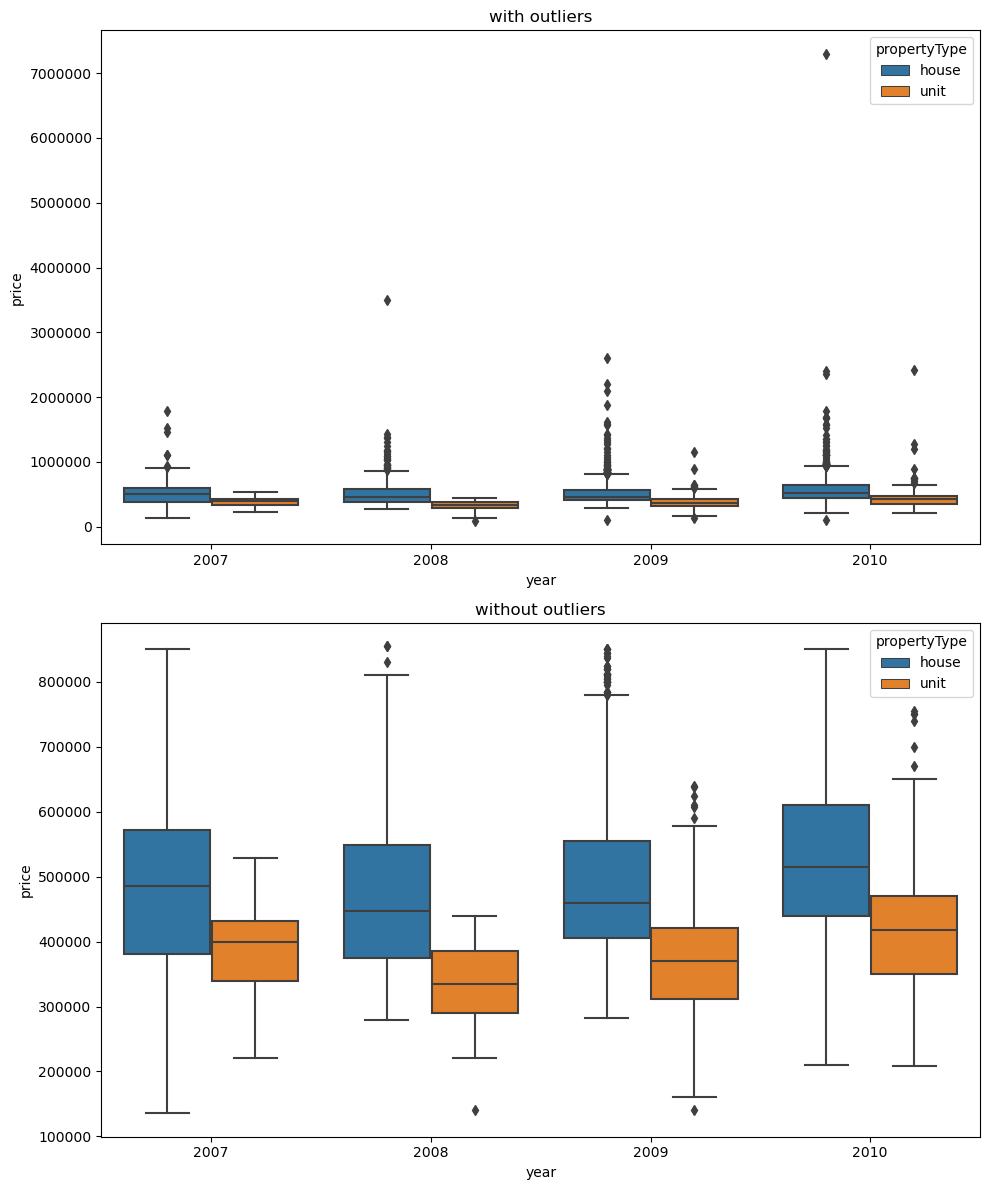

In [130]:
# 2007~2010 추출
# Scalarformatter : 축 눈금 레이블 Scalar 형식으로 지정모듈
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
# 1e6과 같이 과학적표기법이 아닌 스칼라로 표현
formatter.set_scientific(False)

fig, ax = plt.subplots(nrows=2, figsize=(10, 12))
sns.boxplot(data=df, x='year', y='price', hue='propertyType', ax=ax[0])
ax[0].set_title('with outliers')
ax[0].yaxis.set_major_formatter(formatter)

sns.boxplot(data=df_clean, x='year', y='price', hue='propertyType', ax=ax[1])
ax[1].set_title('without outliers')

plt.tight_layout()
plt.show()